In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/most-subscribed-youtube-channel/Most Subscribed YouTube Channels_exported.csv


# Import Libraries --> Data Inspections --> Data Cleaning --> Summary Statistics --> Data Visualization 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/kaggle/input/most-subscribed-youtube-channel/Most Subscribed YouTube Channels_exported.csv')

In [4]:
data.head(10)

,Name,Brand channel,Subscribers (millions),Primary language,Category,Country
0,T-Series,Yes,249.0,Hindi[7][8],Music,India
1,MrBeast,No,184.0,English,Entertainment,United States
2,Cocomelon,Yes,165.0,English,Education,United States
3,Sony Entertainment Television India,Yes,162.0,Hindi[9],Entertainment,India
4,Kids Diana Show,Yes,113.0,English[10][11][12],Entertainment,Ukraine- United States
5,PewDiePie,No,111.0,English,Entertainment,Sweden
6,Like Nastya,No,107.0,English,Entertainment,Russia- United States
7,Vlad and Niki,No,101.0,English,Entertainment,Russia- United States
8,Zee Music Company,Yes,99.5,Hindi[13][14],Music,India
9,WWE,Yes,97.1,English,Sports,United States


In [5]:
data.tail(10)

,Name,Brand channel,Subscribers (millions),Primary language,Category,Country
40,Shemaroo,Yes,48.8,Hindi,Entertainment,India
41,JuegaGerman,No,48.6,Spanish,Entertainment,Chile
42,Billie Eilish,No,48.5,English,Music,United States
43,Get Movies,Yes,48.1,Russian,Entertainment,Russia
44,SonyMusicIndiaVEVO,Yes,47.4,Hindi,Music,India
45,A4,No,47.2,Russian,Entertainment,Belarus
46,Badabun,Yes,47.0,Spanish,Entertainment,Mexico
47,Bad Bunny,No,46.4,Spanish,Music,United States ( Puerto Rico)
48,Har Pal Geo,Yes,46.3,Urdu,Entertainment,Pakistan
49,Fernanfloo,No,46.3,Spanish,Games,El Salvador


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    50 non-null     object 
 1   Brand channel           50 non-null     object 
 2   Subscribers (millions)  50 non-null     float64
 3   Primary language        50 non-null     object 
 4   Category                50 non-null     object 
 5   Country                 50 non-null     object 
dtypes: float64(1), object(5)
memory usage: 2.5+ KB


In [7]:
#check missing values

missing_values = data.isnull().sum()

In [8]:
missing_values

Name                      0
Brand channel             0
Subscribers (millions)    0
Primary language          0
Category                  0
Country                   0
dtype: int64

In [9]:
# check duplicates values

duplicates_rows = data[data.duplicated()]

In [10]:
duplicates_rows

,Name,Brand channel,Subscribers (millions),Primary language,Category,Country


No duplicates and nan values

In [11]:
data.describe()

,Subscribers (millions)
count,50.000000
mean,76.208000
std,39.735225
min,46.300000
25%,53.800000
50%,60.300000
75%,83.950000
max,249.000000


In [12]:
data.columns

Index(['Name', 'Brand channel', 'Subscribers (millions)', 'Primary language',
       'Category', 'Country'],
      dtype='object')

In [13]:
data['Brand channel'].value_counts()

Brand channel
Yes    32
No     18
Name: count, dtype: int64

In [14]:
data['Subscribers (millions)'].value_counts()

Subscribers (millions)
46.3     2
66.6     2
59.7     2
47.0     1
54.7     1
58.8     1
58.7     1
46.4     1
57.8     1
57.4     1
56.5     1
55.7     1
55.6     1
54.1     1
47.2     1
59.8     1
53.0     1
52.9     1
48.8     1
48.6     1
48.5     1
48.1     1
47.4     1
53.7     1
249.0    1
184.0    1
62.4     1
165.0    1
162.0    1
113.0    1
111.0    1
107.0    1
101.0    1
99.5     1
97.1     1
91.2     1
89.5     1
85.2     1
80.2     1
76.4     1
72.6     1
72.4     1
71.9     1
69.5     1
67.5     1
66.3     1
60.8     1
Name: count, dtype: int64

In [15]:
data['Primary language'].value_counts()

Primary language
English                19
Hindi                  13
Spanish                 5
Korean                  3
Russian                 2
Hindi[7][8]             1
Hindi[9]                1
English[10][11][12]     1
Hindi[13][14]           1
Hindi[16]               1
Portuguese              1
Bhojpuri                1
Urdu                    1
Name: count, dtype: int64

In [16]:
data['Category'].value_counts()

Category
Music            22
Entertainment    17
Education         4
Sports            2
Film              2
How-to            1
News              1
Games             1
Name: count, dtype: int64

In [17]:
# Identify popular content areas in various locations.

data['Country'].value_counts()

Country
India                           18
United States                   11
South Korea                      4
Russia- United States            2
United Kingdom                   1
Pakistan                         1
United States ( Puerto Rico)     1
Mexico                           1
Belarus                          1
Russia                           1
Chile                            1
Argentina                        1
Romania                          1
Brazil                           1
Canada                           1
Cyprus[a]                        1
Sweden                           1
Ukraine- United States           1
El Salvador                      1
Name: count, dtype: int64

In [18]:
data.columns

Index(['Name', 'Brand channel', 'Subscribers (millions)', 'Primary language',
       'Category', 'Country'],
      dtype='object')

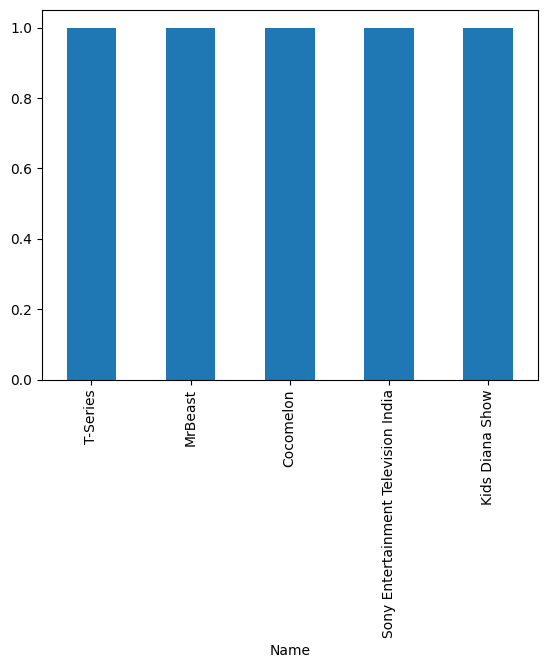

In [19]:
data['Name'].head().value_counts().plot(kind='bar')
plt.show()

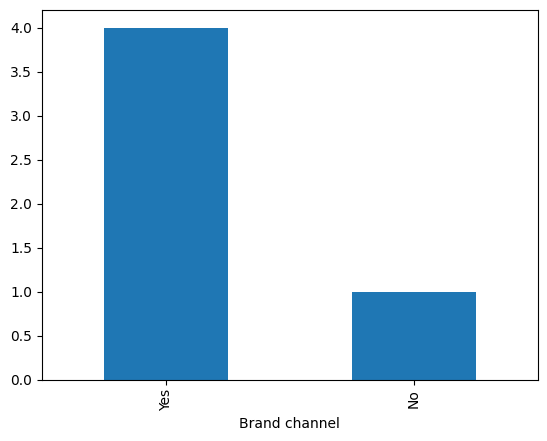

In [20]:
data['Brand channel'].head().value_counts().plot(kind='bar')
plt.show()

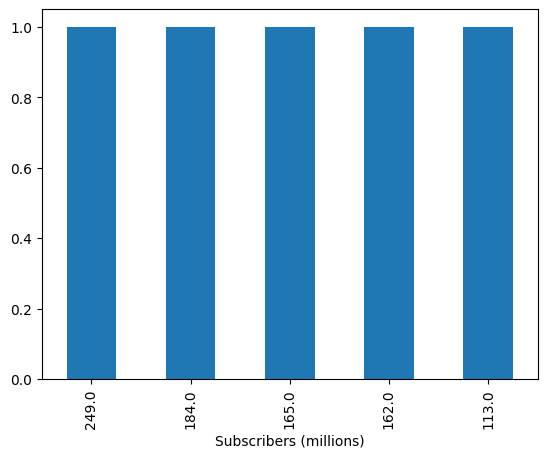

In [21]:
data['Subscribers (millions)'].head().value_counts().plot(kind='bar')
plt.show()

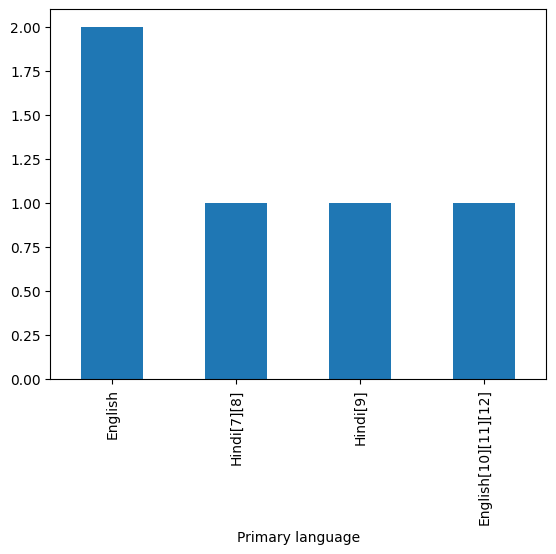

In [22]:
data['Primary language'].head().value_counts().plot(kind='bar')
plt.show()

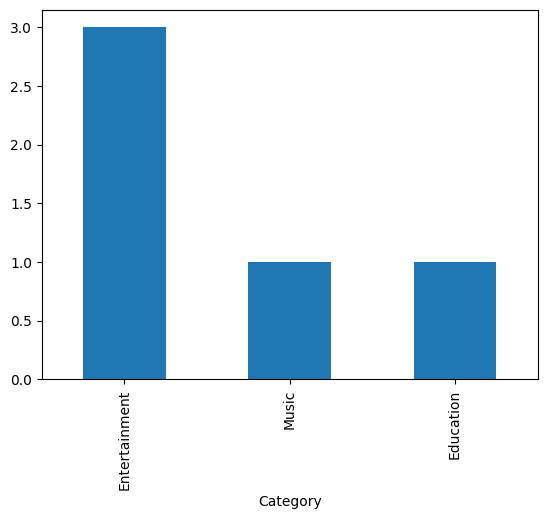

In [23]:
data['Category'].head().value_counts().plot(kind='bar')
plt.show()

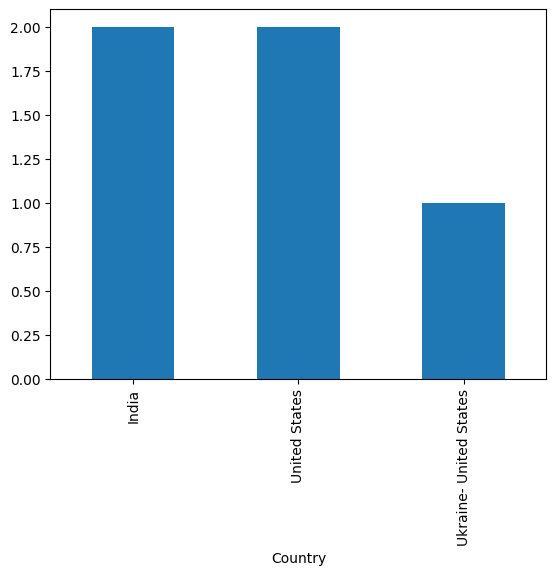

In [24]:
data['Country'].head().value_counts().plot(kind='bar')
plt.show()

In [25]:
data.columns

Index(['Name', 'Brand channel', 'Subscribers (millions)', 'Primary language',
       'Category', 'Country'],
      dtype='object')

In [31]:
# Group by Date and Primary language, calculate total subcribers
grouped_lang = data.groupby(['Name', 'Primary language']).sum()['Subscribers (millions)'].unstack()

In [32]:
# Group by Name and Category, calculate total subcribers
grouped_cat = data.groupby(['Name', 'Category']).sum()['Subscribers (millions)'].unstack()

In [33]:
# Group by Category and Country, calculate total subcribers
grouped_region = data.groupby(['Category', 'Country']).sum()['Subscribers (millions)'].unstack()

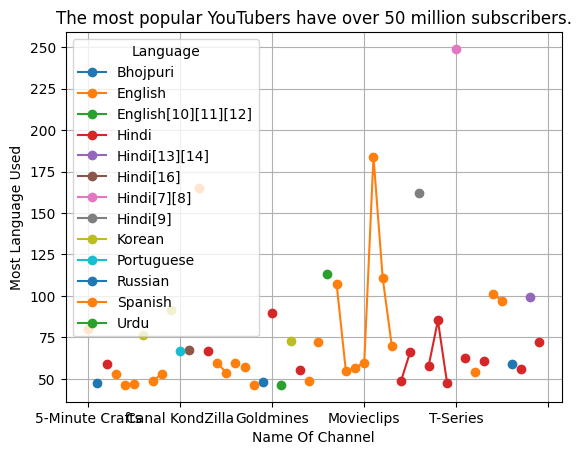

In [48]:
# Plotting trends by language
grouped_lang.plot(kind='line', marker='o')
plt.title('The most popular YouTubers have over 50 million subscribers.')
plt.xlabel('Name Of Channel')
plt.ylabel('Most Language Used')
plt.legend(title='Language')
plt.grid(True)
plt.show()

The most language that used in youtube is Hindi ( T-series )

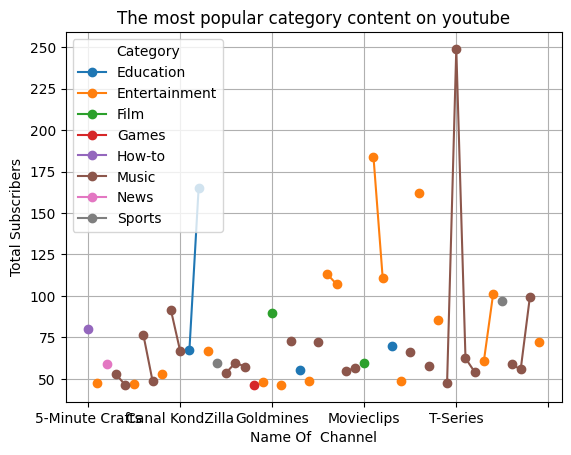

In [46]:
# Plotting trends by category
grouped_cat.plot(kind='line', marker='o')
plt.title('The most popular category content on youtube')
plt.xlabel('Name Of  Channel')
plt.ylabel('Total Subscribers')
plt.legend(title='Category')
plt.grid(True)
plt.show()

The most popular category content on youtube is music from channel T-series

The Most Popular Content In Youtube

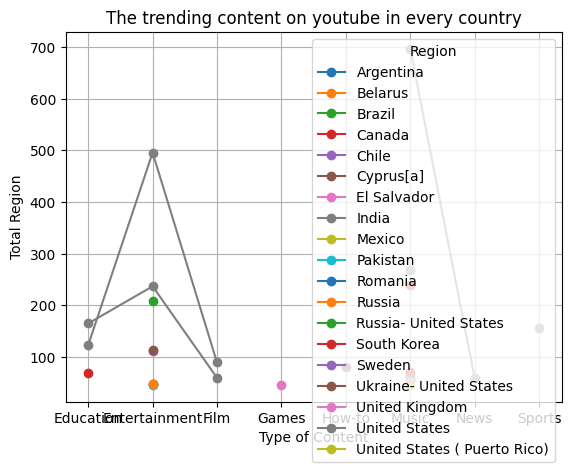

In [47]:
# Plotting trends by region
grouped_region.plot(kind='line', marker='o')
plt.title('The trending content on youtube in every country')
plt.xlabel('Type of Content')
plt.ylabel('Total Region')
plt.legend(title='Region')
plt.grid(True)
plt.show()

The trending content on youtube in every country is United States